# Import libraries

In [1]:
import numpy as np
import pandas as pd
import os

from numpy.lib.nanfunctions import nanvar
from sympy import bernoulli
from tensorflow.python.keras.saving.saved_model.load import metrics
from triton.language import dtype

# Read data

In [2]:
DATASET_PATH = 'Dataset'
DATASET_CSV_PATH = f'{DATASET_PATH}/CSV'

In [3]:
LABEL = {
    'Jump': 0,
    'Kick': 1,
    'Punch': 2,
    'Left': 3,
    'Right': 4,
    'Stand': 5
}

In [4]:
X = []
y = []

# Read all files in the dataset
for label in LABEL:
    for file in os.listdir(f'{DATASET_CSV_PATH}/Train/{label}'):
        df = pd.read_csv(f'{DATASET_CSV_PATH}/Train/{label}/{file}', sep=',')
        X.append(df)
        y.append(LABEL[label])
        print(f"Read file: {file}")

Read file: resized_Jump_35.csv
Read file: resized_Jump_48.csv
Read file: resized_Jump_50.csv
Read file: resized_Jump_70.csv
Read file: resized_Jump_21.csv
Read file: resized_Jump_33.csv
Read file: resized_Jump_16.csv
Read file: resized_Jump_57.csv
Read file: resized_Jump_11.csv
Read file: resized_Jump_60.csv
Read file: resized_Jump_69.csv
Read file: resized_Jump_25.csv
Read file: resized_Jump_67.csv
Read file: resized_Jump_10.csv
Read file: resized_Jump_22.csv
Read file: resized_Jump_20.csv
Read file: resized_Jump_24.csv
Read file: resized_Jump_54.csv
Read file: resized_Jump_51.csv
Read file: resized_Jump_12.csv
Read file: resized_Jump_37.csv
Read file: resized_Jump_38.csv
Read file: resized_Jump_45.csv
Read file: resized_Jump_62.csv
Read file: resized_Jump_58.csv
Read file: resized_Jump_36.csv
Read file: resized_Jump_32.csv
Read file: resized_Jump_29.csv
Read file: resized_Jump_26.csv
Read file: resized_Jump_40.csv
Read file: resized_Jump_31.csv
Read file: resized_Jump_28.csv
Read fil

In [5]:
# Drop first and second columns
for i, element in enumerate(X):
    X[i] = element.drop(element.columns[[0, 1]], axis=1)

In [6]:
X[0]

,pose_0,pose_1,pose_2,pose_3,pose_4,pose_5,pose_6,pose_7,pose_8,pose_9,...,right_hand_11,right_hand_12,right_hand_13,right_hand_14,right_hand_15,right_hand_16,right_hand_17,right_hand_18,right_hand_19,right_hand_20
0,"(0.778158962726593, 0.21547336876392365, -0.54...","(0.791760265827179, 0.2087160348892212, -0.511...","(0.7980364561080933, 0.21171751618385315, -0.5...","(0.8051425814628601, 0.21494510769844055, -0.5...","(0.7719106674194336, 0.2041754275560379, -0.51...","(0.7634759545326233, 0.20395585894584656, -0.5...","(0.754401683807373, 0.2041034698486328, -0.516...","(0.8102291822433472, 0.23241214454174042, -0.3...","(0.735808789730072, 0.22035932540893555, -0.35...","(0.7860084176063538, 0.24209925532341003, -0.4...",...,"(0.6234856247901917, 0.6386308073997498, -0.01...","(0.6202366948127747, 0.6308886408805847, -0.01...","(0.5937053561210632, 0.6230560541152954, -0.01...","(0.6090567111968994, 0.6414158940315247, -0.01...","(0.6130985617637634, 0.6376226544380188, -0.01...","(0.610612154006958, 0.6306852102279663, -0.011...","(0.5838092565536499, 0.6235931515693665, -0.01...","(0.5964623689651489, 0.6384485363960266, -0.01...","(0.601312518119812, 0.6353214383125305, -0.010...","(0.5996884107589722, 0.629329264163971, -0.008..."
1,"(0.7777351140975952, 0.21283522248268127, -0.5...","(0.791404664516449, 0.2050764560699463, -0.511...","(0.7980102896690369, 0.2077476978302002, -0.51...","(0.8051563501358032, 0.21084025502204895, -0.5...","(0.7711330652236938, 0.2011338174343109, -0.51...","(0.7628247141838074, 0.2009512186050415, -0.51...","(0.7541455626487732, 0.20103494822978973, -0.5...","(0.8113713264465332, 0.22982890903949738, -0.3...","(0.7357392311096191, 0.2167648822069168, -0.35...","(0.7859915494918823, 0.2396627962589264, -0.48...",...,"(0.6171534061431885, 0.6318070292472839, -0.01...","(0.6211166977882385, 0.6271341443061829, -0.01...","(0.5900445580482483, 0.6124536395072937, -0.01...","(0.59867262840271, 0.6296486258506775, -0.0134...","(0.6058868765830994, 0.6290173530578613, -0.01...","(0.6090448498725891, 0.6245424747467041, -0.00...","(0.5838926434516907, 0.6108607649803162, -0.01...","(0.590349555015564, 0.6250004768371582, -0.012...","(0.5961733460426331, 0.6248736381530762, -0.00...","(0.5987992286682129, 0.6206451654434204, -0.00..."
2,"(0.7770131826400757, 0.2065335512161255, -0.54...","(0.7905074954032898, 0.19882284104824066, -0.5...","(0.797431230545044, 0.20106752216815948, -0.50...","(0.8047337532043457, 0.2039937525987625, -0.50...","(0.7703709006309509, 0.19537201523780823, -0.5...","(0.7620455026626587, 0.19507652521133423, -0.5...","(0.7534900307655334, 0.19515526294708252, -0.5...","(0.8113659620285034, 0.22262296080589294, -0.3...","(0.735424816608429, 0.20925720036029816, -0.34...","(0.785140872001648, 0.23255041241645813, -0.47...",...,"(0.6201987862586975, 0.6161034107208252, -0.01...","(0.6227922439575195, 0.6113426089286804, -0.01...","(0.5906751751899719, 0.5957725644111633, -0.01...","(0.6021422147750854, 0.6161910891532898, -0.01...","(0.6088621616363525, 0.6136751174926758, -0.01...","(0.6099351644515991, 0.6077437996864319, -0.01...","(0.5845775604248047, 0.5970353484153748, -0.01...","(0.59433513879776, 0.6134116053581238, -0.0161...","(0.5998961329460144, 0.6117722392082214, -0.01...","(0.600361168384552, 0.606404185295105, -0.0135..."
3,"(0.7755938172340393, 0.19027036428451538, -0.5...","(0.7893335223197937, 0.18175353109836578, -0.5...","(0.7964152693748474, 0.18477772176265717, -0.5...","(0.8039599657058716, 0.18840940296649933, -0.5...","(0.7698872685432434, 0.17731836438179016, -0.5...","(0.7618075013160706, 0.17677468061447144, -0.5...","(0.7534188032150269, 0.17633019387722015, -0.5...","(0.8113506436347961, 0.20791180431842804, -0.3...","(0.7354045510292053, 0.19329068064689636, -0.3...","(0.7832223176956177, 0.21621224284172058, -0.4...",...,"(0.6194025874137878, 0.5910155773162842, -0.01...","(0.6180118322372437, 0.5846542716026306, -0.01...","(0.5932385325431

In [552]:
X[0].columns

Index(['pose_0', 'pose_1', 'pose_2', 'pose_3', 'pose_4', 'pose_5', 'pose_6',
       'pose_7', 'pose_8', 'pose_9', 'pose_10', 'pose_11', 'pose_12',
       'pose_13', 'pose_14', 'pose_15', 'pose_16', 'pose_17', 'pose_18',
       'pose_19', 'pose_20', 'pose_21', 'pose_22', 'pose_23', 'pose_24',
       'pose_25', 'pose_26', 'pose_27', 'pose_28', 'pose_29', 'pose_30',
       'pose_31', 'pose_32', 'left_hand_0', 'left_hand_1', 'left_hand_2',
       'left_hand_3', 'left_hand_4', 'left_hand_5', 'left_hand_6',
       'left_hand_7', 'left_hand_8', 'left_hand_9', 'left_hand_10',
       'left_hand_11', 'left_hand_12', 'left_hand_13', 'left_hand_14',
       'left_hand_15', 'left_hand_16', 'left_hand_17', 'left_hand_18',
       'left_hand_19', 'left_hand_20', 'right_hand_0', 'right_hand_1',
       'right_hand_2', 'right_hand_3', 'right_hand_4', 'right_hand_5',
       'right_hand_6', 'right_hand_7', 'right_hand_8', 'right_hand_9',
       'right_hand_10', 'right_hand_11', 'right_hand_12', 'right_hand_

In [7]:
for i, element in enumerate(X):
    for column in element.columns:
        X[i][column] = X[i][column].apply(lambda x: np.array(x[1:-1].split(',')).astype(np.float32))

## Convert All Sequences to the Same Length

In [23]:
# Get the maximum length of all sequences
Max_dim = 0
all_dim = []
for i, element in enumerate(X):
    Max_dim = max(Max_dim, element.shape[0])
    all_dim.append(element.shape[0])
    print(f"Element {i} shape: {np.shape(element)}, label: {y[i]}")
print(f"Max dim: {Max_dim}")

Element 0 shape: (61, 75), label: 0
Element 1 shape: (61, 75), label: 0
Element 2 shape: (64, 75), label: 0
Element 3 shape: (54, 75), label: 0
Element 4 shape: (66, 75), label: 0
Element 5 shape: (453, 75), label: 0
Element 6 shape: (55, 75), label: 0
Element 7 shape: (60, 75), label: 0
Element 8 shape: (72, 75), label: 0
Element 9 shape: (31, 75), label: 0
Element 10 shape: (39, 75), label: 0
Element 11 shape: (29, 75), label: 0
Element 12 shape: (31, 75), label: 0
Element 13 shape: (75, 75), label: 0
Element 14 shape: (59, 75), label: 0
Element 15 shape: (60, 75), label: 0
Element 16 shape: (35, 75), label: 0
Element 17 shape: (61, 75), label: 0
Element 18 shape: (61, 75), label: 0
Element 19 shape: (60, 75), label: 0
Element 20 shape: (61, 75), label: 0
Element 21 shape: (67, 75), label: 0
Element 22 shape: (61, 75), label: 0
Element 23 shape: (31, 75), label: 0
Element 24 shape: (61, 75), label: 0
Element 25 shape: (61, 75), label: 0
Element 26 shape: (66, 75), label: 0
Element 27

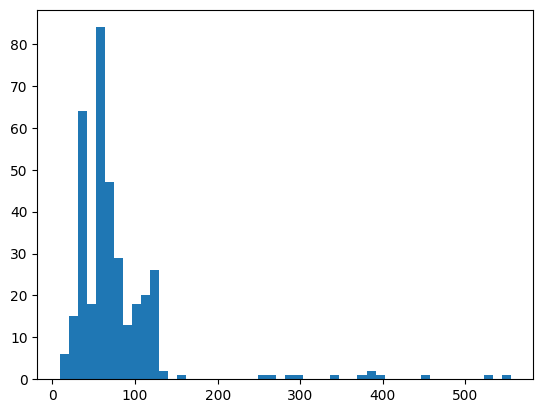

In [24]:
# Visualize the distribution of the lengths of all sequences
import matplotlib.pyplot as plt
plt.hist(all_dim, bins=50)
plt.show()

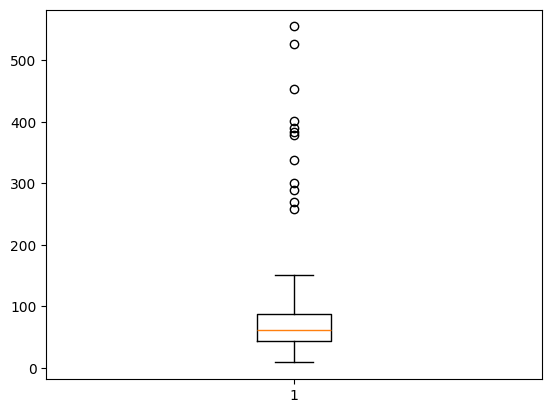

In [26]:
# Visualize the boxplot of the lengths of all sequences
plt.boxplot(all_dim)
plt.show()

### Handle the Outliers and make the lengths of all sequences the same
Handle different lengths of sequences
    Set the maximum length = 1.5 * IQR + Q3
    
    * Case 1: If e_dim < Max_dim, then increase the length of the sequence by duplicating each row until the length of the sequence is equal to Max_dim
    * Case 2: If e_dim > Max_dim, then truncate randomly the sequence until the length of the sequence is equal to Max_dim
    * Case 3: If e_dim = Max_dim, then keep the sequence as it is

In [27]:
# Convert all sequences to the same length
Q1 = np.percentile(all_dim, 25)
Q3 = np.percentile(all_dim, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Q1: 44.5, Q3: 88.0, IQR: 43.5, Lower bound: -20.75, Upper bound: 153.25


In [45]:
Max_dim = int(upper_bound) + 1  

In [475]:
# Get first row of X[0]
X[0].iloc[0]

pose_0            [0.77815896, 0.21547337, -0.54420125]
pose_1              [0.79176027, 0.20871603, -0.511417]
pose_2             [0.79803646, 0.21171752, -0.5114372]
pose_3             [0.8051426, 0.21494511, -0.51145446]
pose_4             [0.77191067, 0.20417543, -0.5163067]
                                  ...                  
right_hand_16     [0.61061215, 0.6306852, -0.011333054]
right_hand_17    [0.58380926, 0.62359315, -0.011811154]
right_hand_18    [0.59646237, 0.63844854, -0.012831959]
right_hand_19     [0.6013125, 0.63532144, -0.010323574]
right_hand_20     [0.5996884, 0.62932926, -0.008283388]
Name: 0, Length: 75, dtype: object

In [513]:
X_train_temp = []

def pad_or_truncate(element, max_dim):
    current_length = element.shape[0]
    if current_length < max_dim:
        # Pad by repeating elements until reaching the desired length
        metric_temp = []
        j = 0
        while len(metric_temp) != max_dim:
            metric_temp.append(element.iloc[j])
            if len(metric_temp) != max_dim:
                metric_temp.append(element.iloc[j])
            j = (j + 1) % current_length  # Cycle through the indices
        return np.array(metric_temp)

    elif current_length > max_dim:
        metrics_temp = []
        # Down sample by taking every nth element
        step = max(4, current_length // (current_length - max_dim))  # Ensure step is at least 4
        j = 0
        while len(metrics_temp) != max_dim:
            metrics_temp.append(element.iloc[j])
            j = (j + step) % current_length  # Cycle through the indices
        return np.array(metrics_temp)
    return element
# Pad all sequences to the same length
for i, element in enumerate(X):
    print(f"Before padding, element {i} shape: {np.shape(element)}")
    padded_element = pad_or_truncate(element, Max_dim)
    X_train_temp.append(padded_element)
    print(f"After padding, element {i} shape: {np.shape(X_train_temp[-1])}")

Before padding, element 0 shape: (61, 75)
After padding, element 0 shape: (154, 75)
Before padding, element 1 shape: (61, 75)
After padding, element 1 shape: (154, 75)
Before padding, element 2 shape: (64, 75)
After padding, element 2 shape: (154, 75)
Before padding, element 3 shape: (54, 75)
After padding, element 3 shape: (154, 75)
Before padding, element 4 shape: (66, 75)
After padding, element 4 shape: (154, 75)
Before padding, element 5 shape: (453, 75)
After padding, element 5 shape: (154, 75)
Before padding, element 6 shape: (55, 75)
After padding, element 6 shape: (154, 75)
Before padding, element 7 shape: (60, 75)
After padding, element 7 shape: (154, 75)
Before padding, element 8 shape: (72, 75)
After padding, element 8 shape: (154, 75)
Before padding, element 9 shape: (31, 75)
After padding, element 9 shape: (154, 75)
Before padding, element 10 shape: (39, 75)
After padding, element 10 shape: (154, 75)
Before padding, element 11 shape: (29, 75)
After padding, element 11 shap

In [515]:
X_train_temp = np.array(X_train_temp)
y_train = np.array(y)

In [525]:
X_train_temp[0]

array([[array([ 0.77815896,  0.21547337, -0.54420125], dtype=float32),
        array([ 0.79176027,  0.20871603, -0.511417  ], dtype=float32),
        array([ 0.79803646,  0.21171752, -0.5114372 ], dtype=float32),
        ...,
        array([ 0.59646237,  0.63844854, -0.01283196], dtype=float32),
        array([ 0.6013125 ,  0.63532144, -0.01032357], dtype=float32),
        array([ 0.5996884 ,  0.62932926, -0.00828339], dtype=float32)],
       [array([ 0.77815896,  0.21547337, -0.54420125], dtype=float32),
        array([ 0.79176027,  0.20871603, -0.511417  ], dtype=float32),
        array([ 0.79803646,  0.21171752, -0.5114372 ], dtype=float32),
        ...,
        array([ 0.59646237,  0.63844854, -0.01283196], dtype=float32),
        array([ 0.6013125 ,  0.63532144, -0.01032357], dtype=float32),
        array([ 0.5996884 ,  0.62932926, -0.00828339], dtype=float32)],
       [array([ 0.7777351 ,  0.21283522, -0.54432577], dtype=float32),
        array([ 0.79140466,  0.20507646, -0.51173

In [516]:
X_train_temp.shape

(355, 154, 75)

In [517]:
X_train = np.full((X_train_temp.shape[0], X_train_temp.shape[1], X_train_temp.shape[2], 3), np.nan, dtype=np.float32)

for i, element in enumerate(X_train_temp):
    for j, row in enumerate(element):
        for k, value in enumerate(row):
            # Check if the value is np.array([nan, nan, nan])
            if np.isnan(value).all():
                X_train_temp[i][j][k] = np.array([np.nan, np.nan, np.nan], dtype=np.float32)
            else:
                X_train_temp[i][j][k] = value
                
            X_train[i][j][k] = X_train_temp[i][j][k][:3]

In [527]:
X_train.shape

(355, 154, 75, 3)

In [526]:
X_train[0][:, 0]

array([[ 0.77815896,  0.21547337, -0.54420125],
       [ 0.77815896,  0.21547337, -0.54420125],
       [ 0.7777351 ,  0.21283522, -0.54432577],
       [ 0.7777351 ,  0.21283522, -0.54432577],
       [ 0.7770132 ,  0.20653355, -0.5440005 ],
       [ 0.7770132 ,  0.20653355, -0.5440005 ],
       [ 0.7755938 ,  0.19027036, -0.54473484],
       [ 0.7755938 ,  0.19027036, -0.54473484],
       [ 0.77422273,  0.17576307, -0.5541646 ],
       [ 0.77422273,  0.17576307, -0.5541646 ],
       [ 0.7708291 ,  0.16102171, -0.5927615 ],
       [ 0.7708291 ,  0.16102171, -0.5927615 ],
       [ 0.76802146,  0.14440534, -0.6404425 ],
       [ 0.76802146,  0.14440534, -0.6404425 ],
       [ 0.76637405,  0.12771514, -0.65467775],
       [ 0.76637405,  0.12771514, -0.65467775],
       [ 0.76614845,  0.11670127, -0.68339026],
       [ 0.76614845,  0.11670127, -0.68339026],
       [ 0.76642746,  0.10291715, -0.7360066 ],
       [ 0.76642746,  0.10291715, -0.7360066 ],
       [ 0.766002  ,  0.0975992 , -0.802

## Handle Fill NaN Values

### Step 1: Compute the variance of each metric for each sequence.

### Step 2: Fill NaN
   * **Case 1**: If `element[i]` doesn't have a value before, then get the value from the nearest posterior element, and adjust by adding or subtracting the variance of the metric.
   * **Case 2**: If `element[i]` doesn't have a value after, then get the value from the nearest previous element, and adjust by adding or subtracting the variance of the metric.
   * **Case 3**: If `element[i]` has values both before and after, then use the nearest previous and posterior elements:
     - For \( k < i < l \):

$$
\text{element}[i] = \text{element}[k] + (\text{element}[l] - \text{element}[k]) \times \frac{i - k}{l - k}
$$


### Step 1: Compute the variance of each metric for each sequence.

In [720]:
X_train.shape

(355, 154, 75, 3)

In [721]:
cnt = 0

In [722]:
np.nanvar(X_train[0][:, 0], axis=0)

array([1.2132312e-05, 2.2984508e-03, 6.3427784e-03], dtype=float32)

In [723]:
variance_metric = np.empty((X_train.shape[0], X_train.shape[2], 3), dtype=np.float32)
variance_metric.shape

(355, 75, 3)

In [724]:
X_train[0][:, 0].shape

(154, 3)

In [725]:
np.nanvar(X_train[1][:, 0], axis=0)

array([4.2336069e-05, 4.2221225e-03, 1.2735963e-02], dtype=float32)

In [726]:
cls_nan = dict()

for i, element in enumerate(X_train):
    sub_variance_metric = np.empty((element.shape[1], 3), dtype=np.float32)
    
    for j in range(element.shape[1]):
        variance = np.array([np.nan, np.nan, np.nan], dtype=np.float32)
        
        # If there are more than 1 non-NaN values, calculate variance
        if np.count_nonzero(~np.isnan(element[:, j])) > 1:
            variance = np.nanvar(element[:, j], axis=0)
            print(variance)
        else:
            print(f"Element {i}, Metric {j}, Variance: {variance}")
            if i not in cls_nan:
                cls_nan[i] = []
            cls_nan[i].append(j)
        # convert to list
        sub_variance_metric[j] = variance
    # print(sub_variance_metric)
    variance_metric[i] = sub_variance_metric

[1.2132312e-05 2.2984508e-03 6.3427784e-03]
[8.6321888e-06 2.3862103e-03 6.3206577e-03]
[7.2466064e-06 2.3878103e-03 6.3167112e-03]
[6.2332861e-06 2.3923656e-03 6.3158791e-03]
[1.3358501e-05 2.3994383e-03 6.3446541e-03]
[1.6838432e-05 2.4036481e-03 6.3480982e-03]
[2.2034870e-05 2.4023203e-03 6.3466337e-03]
[3.672173e-06 2.354246e-03 4.864887e-03]
[2.0764353e-05 2.3792188e-03 4.8243348e-03]
[1.0540230e-05 2.2470879e-03 5.4305103e-03]
[1.3549880e-05 2.2357404e-03 5.5055679e-03]
[4.6430105e-06 2.3288275e-03 2.1847251e-03]
[3.7513544e-06 2.4087816e-03 1.5628878e-03]
[1.6626558e-05 3.2125167e-03 3.0126758e-03]
[3.8403668e-05 3.1553064e-03 7.2155315e-03]
[9.2127784e-06 2.7678884e-03 1.1564558e-02]
[0.0002045  0.00235105 0.03440689]
[7.1009772e-06 2.8094680e-03 1.5487756e-02]
[0.00043543 0.00228159 0.04238147]
[9.2671680e-06 2.7194112e-03 1.4477064e-02]
[0.00045462 0.00225731 0.03897617]
[7.2928333e-06 2.7273956e-03 1.1624940e-02]
[0.00036823 0.00230552 0.0340975 ]
[2.0187917e-05 2.6784490e-0

In [727]:
variance_metric = np.array([variance_metric], dtype=np.float32)

In [728]:
variance_metric = variance_metric.reshape(variance_metric.shape[1], variance_metric.shape[2], variance_metric.shape[3])

In [729]:
variance_metric.shape

(355, 75, 3)

In [666]:
# convert to cls_nan to pandas dataframe
cls_nan.keys()

dict_keys([72, 73, 99, 101, 115, 134, 144, 149, 153, 159, 164, 166, 167, 176, 184, 189, 192, 194, 202, 204, 207, 209, 215, 216, 217, 221, 223, 227, 230, 246, 287, 290, 294, 295, 297, 322, 323, 326, 330, 332, 333, 343, 346, 348, 350, 353])

In [671]:
LABEL

{'Jump': 0, 'Kick': 1, 'Punch': 2, 'Left': 3, 'Right': 4, 'Stand': 5}

### Step 2: Fill NaN
   * **Case 1**: If `element[i]` doesn't have a value before, then get the value from the nearest posterior element, and adjust by adding or subtracting the variance of the metric.
   * **Case 2**: If `element[i]` doesn't have a value after, then get the value from the nearest previous element, and adjust by adding or subtracting the variance of the metric.
   * **Case 3**: If `element[i]` has values both before and after, then use the nearest previous and posterior elements:
     - For \( k < i < l \):

$$
\text{element}[i] = \text{element}[k] + (\text{element}[l] - \text{element}[k]) \times \frac{i - k}{l - k}
$$


In [735]:
X_train.shape

(355, 154, 75, 3)

In [731]:
variance_metric.shape

(355, 75, 3)

In [828]:
# Function to fill NaN values based on the described cases
def fill_nan(element, variance_metric):
    old_value = None
    k = 0
    
    for i in range(element.shape[0]):
        if np.isnan(element[i]).all():
            # Case 1: If element[i] doesn't have a value before, then get the value from the nearest posterior element, and adjust by adding or subtracting the variance of the metric.
            if old_value is None:
                for l in range(i + 1, element.shape[0]):
                    if not np.isnan(element[l]).all():
                        element[i] = element[l] + abs(i - l) * variance_metric
                        break
            else:
                # Case 2: If element[i] doesn't have a value after, then get the value from the nearest previous element, and adjust by adding or subtracting the variance of the metric.
                flat = False
                for l in range(i + 1, element.shape[0]):
                    if not np.isnan(element[l]).all():
                        if l != k:
                            element[i] = old_value + (element[l] - old_value) / ((i - k) / (l - k))
                            flat = True
                            break
                if not flat:
                    # Case 3: If element[i] has values both before and after, then use the nearest previous and posterior elements
                    element[i] = old_value - abs(i - k) * variance_metric
        old_value = element[i]
    return element

In [829]:
X_train_new = np.empty(X_train.shape, dtype=np.float32)
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[2]):
        # print("Shape of element: ", X_train[i][: , j].shape)
        # print("Shape of variance: ", variance_metric[i][j].shape)
        X_train_new[i][: , j] = fill_nan(X_train[i][: , j], variance_metric[i][j])

In [ ]:
np.isnan(np.array([np.nan, np.nan, 0])).sum()

In [846]:
variance_metric[0][2]

array([7.2466064e-06, 2.3878103e-03, 6.3167112e-03], dtype=float32)

In [857]:
# Drop data with NaN values
drop_index = list(cls_nan.keys())
# Drop data in X_train_new that has index in drop_index
X_train_new = np.delete(X_train_new, drop_index, axis=0)
y_train = np.delete(y_train, drop_index, axis=0)

In [860]:
y_train.shape

(309,)

In [858]:
X_train_new.shape

(309, 154, 75, 3)

In [861]:
# Save the processed data
np.save('X_train.npy', X_train_new)
np.save('y_train.npy', y_train)

## LSTM model LSTM model

In [5]:
import tensorflow as tf
# check version
print(tf.__version__)

2.17.0


In [6]:
# Define LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(10, 1)),
    tf.keras.layers.Dense(1)
])

I0000 00:00:1728058924.283163   41447 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728058924.414095   41447 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728058924.414212   41447 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728058924.415271   41447 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [ ]:
# Compile model
model.compile(loss='mse', optimizer='adam')